# Exploratory Data Analysis
Welcome to the final lesson in your ENDURE experience!

With some Python essentials and analytical tools now in your skillset, this notebook will synthesize what you've learned so far into an analysis of a real dataset.

### At the end of this notebook, you'll be able to:
* Use Pandas functions to inspect the amount, completeness, and unique values in a dataframe
* Explore data distributions with pairplots
* Use categorical data to augment pairplots to show inter-categorical differences
* Make use of GroupBy functions to examine subsets of the data
* Apply an appropriate test to measure the size of any differences and determine their statistical significance


### Downloading the Data

To switch things up, but not too much, we'll use a different dataset from the Allen Institute for Brain Science Cell Types resource.

> **Note**: Some functions return multiple values, such as `urllib.request`. When you don't care about storing one or more of these values, you can assign it to `_` (single underscore with no other characters) to discard it. In the code cell below, this is done to discard the header info returned, which isn't useful for us

In [3]:
import urllib.request

data_url = 'https://raw.githubusercontent.com/ajuavinett/CellTypesLesson/master/utilities/human_cell_metrics.csv'
data_file, _ = urllib.request.urlretrieve(data_url, 'human_cells.csv')

## Part 1. Describing Data with Pandas

In the last lesson, you saw how to use Pandas's `describe` function to generate common statistics about the numerical fields in a dataframe. Here you'll learn two more that are quite useful: `info` and `value_counts`

Invoking `info` works the same way as you called describe. Try filling out the cell below.

In [ ]:
import pandas as pd
data_df = pd.read_csv('human_cells.csv')
data_df.

In [5]:
# Expected output

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cell_surface_area  156 non-null    float64
 1   dendrite_type      156 non-null    object 
 2   rheobase           156 non-null    float64
 3   input_resistance   156 non-null    float64
 4   tau                156 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.2+ KB


It may look plain, but this printed info can tell you *a lot* about the data you're working with. From this printout, we can see

* there are 156 rows in the data
* there are 5 columns (not including the index column)
* there are 4 columns of type `float64` and 1 of `object` - see the note below to understand what this means - and which columns are which type
* the memory usage (in RAM) of the data
* how many non-null values are in each column

If the count of non-null values is less than the number of rows, then you can immediately tell some of your data might be incomplete. It doesn't look like any data is missing in this set, so we don't have to worry about imputing missing values or dropping incomplete records.

> **Note**: What are `float64`s and `object`s? The `object` datatype is generic for any data type Pandas doesn't know how to interpret, but more importantly it's how raw text will show up in a dataframe, so such columns nearly always have text data. As for `float64`, this refers to "64-bit [floating point number](https://en.wikipedia.org/wiki/Floating-point_arithmetic)," the standard way computers represent decimal values. If you want to learn more, follow the link, but you don't need to know any more to complete this lesson

Now let's try `value_counts`. Unlike `describe` and `info`, it's not valuable to call `value_counts` on the entire dataframe. Instead, you should call it on a specific column or set of columns separately. `value_counts` is especially useful when called on columns that can take on a limited set of values (e.g. a column representing an integer rating from 1-10) or `object` type columns.

For future convenience, save the results in a variable called `dendrite_value_counts`.

In [ ]:
dendrite_value_counts = 
dendrite_value_counts

In [28]:
# Expected output

spiny             110
aspiny             37
sparsely spiny      9
Name: dendrite_type, dtype: int64

This tells us that we have 110 cells that are "spiny", 37 are classified as "aspiny", and only 9 are "sparsely spiny". This helps give us an intuitive idea of which types are most represented in our data.

Notice that `value_counts` returns what's called a `Series`, the data type underlying individual columns of a `Dataframe`. The indices of the `Series` are the text representations of the unique values in the `dendrite_type` column, and the values of the returned data frame are the (64-bit integer) counts corresponding to each unique value. By default, `value_counts` returns the results in descending order, with the most frequent element in the first row.

## Part II. Describing Data, but *Prettier*

At this point, you may be enthralled by Pandas's ability to print text that says things, some of which is meaningful. Now we'll try to enrich our understanding of data with *visualizations*. This is worth doing for more than just cosmetic reasons - some trends in data are much easier to see and intuit when looking at the right visualization than with text or tables.

Pandas has some built-in visualization capabilities, but you'll also use `seaborn` to go a step further. Both of these require us to import `matplotlib`, the basis for many of Python's data visualization capabilities. First, use Pandas's `plot` function to make a simple bar chart of the value counts you saved earlier. To do this:

1. Type the name of the variable you saved the value counts in. (hint: see the last exercise)
2. Call the `plot` function belonging to that variable. (hint: take a look at how you used `describe` and `info` in previous sections)
3. Pass the keyword argument `kind='barh'` to the `plot` function to produce a horizontal bar graph.

In [ ]:
import matplotlib.pyplot as plt

# Type your command here

<AxesSubplot:>

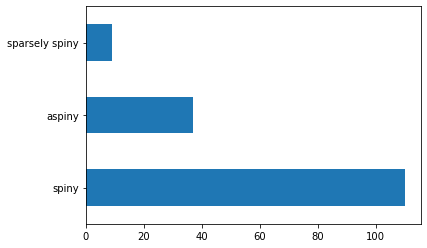

In [14]:
# Expected result (the vertical order is not important)

This information is the same as what `value_counts` told us, but sometimes scale is easier to interpret with a visual aid.

We'll revisit the types of dendrites soon, but first let's use `seaborn.pairplot` to quickly visualize the other columns in the data. The `pairplot` function takes the entire dataframe as its first argument.

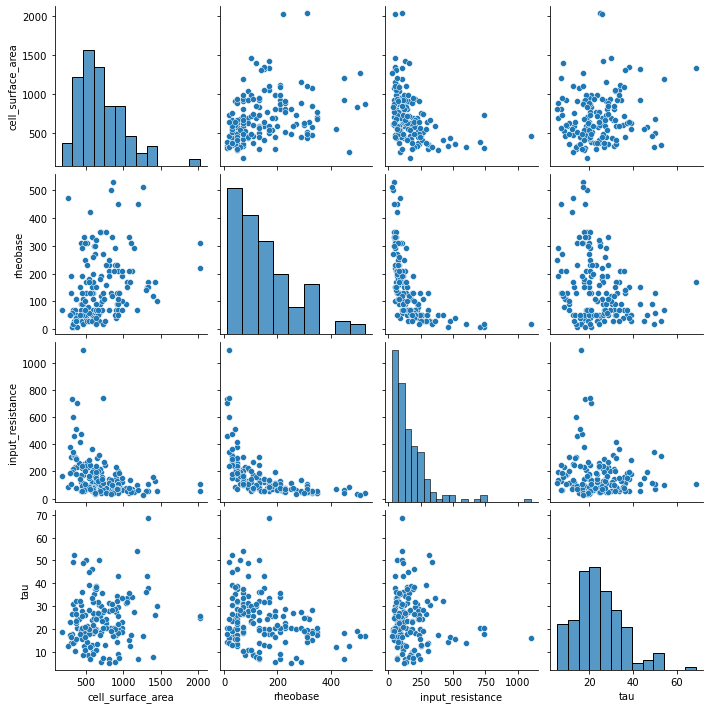

In [16]:
import seaborn

seaborn.pairplot(data_df)

As the name implies, `pairplot` takes each pair of columns from the dataframe and displays one on the x-axis and the other on the y-axis, which can help reveal correlations and interactions between them. The histograms on the diagonal entries of the pairplot show the single-variable distribution, since it wouldn't be very helpful to plot a column against itself.

You may notice some odd about this pairplot, however - it's 4 x 4, but we had 5 columns in our data. That's because `pairplot` only visualizes the numerical data columns, not the categorical (i.e. text) columns. There is a way for us to make use of such categorical columns though.

## Part III. Testing Your Ideas

Now that you've explored your data's characteristics a bit, you need a way to test whether the trends you suspect are in the data are actually there. The most intuitive way to do this with the cell type data is to look for differences distributions of each type of dendrite.

To do that kind of analysis, pandas includes the powerfuly `groupby` function to allow you to loop over subsets of the dataframe based on the unique values of one or more columns. Complete the code in the loop below to call the `describe` function you learned in the previous lesson on the grouped dataframes and return just the mean and standard deviation of each.

**Hint:** `describe` does the heavy-lifting for you. You will want to make use of the `.loc` attribute data to get the mean and standard deviation from the results of `describe`, rather than calling the `mean` or `std` functions.

In the code cell below:
a) Assign `groups` to the correct value, using the `groupby` function
b) Fill in the the right value for `loc` so that you only get the mean and standard deviation

In [ ]:
groups = 
for group_name, group_df in groups:
    print("DESCRIPTION OF", group_name)
    
    print(group_df.describe().loc[...])

In [25]:
# Expected output

DESCRIPTION OF aspiny
      cell_surface_area    rheobase  input_resistance        tau
mean         663.657014  107.297297         255.25476  16.500075
std          244.953519   95.208796         204.21057  11.128428
DESCRIPTION OF sparsely spiny
      cell_surface_area   rheobase  input_resistance        tau
mean         469.914153  47.777778        360.783444  19.252848
std          218.165780  28.185891        215.405309   4.357226
DESCRIPTION OF spiny
      cell_surface_area    rheobase  input_resistance        tau
mean         729.908338  170.545454        119.272711  27.271170
std          333.033980  119.830432         82.538888   9.863712


<font color='blue'>**Breakout room activity!** 
</font>

Try calling pair plot again, as before, but this time include the keyword argument `hue='dendrite_type'` in your function call. Doing so will instruct `pairplot` to change the color of the plotted data based on whether that data point belongs to a spiny, aspiny, or sparsely spiny category.

Now you can unapologetically declare your data has some color to it! Compare this version with the uncategorized version you produced above, and you should start to see some interesting trends. For example, you may notice how all three colors seem to overlap a lot in the comparisons of rheobase and cell surface area, but in plots involving the tau and input resistence, the spiny and aspiny data points inter-mingle much less frequently, and the sparsely spiny data points tend to exist in between the values of the other two categories. The tau distribution on its own (bottom-right of the grid) suggests the different dendrite types might have different means, especially between spiny and aspiny cells.

What other trends do you find interesting about these visualizations?

<hr>

## About this notebook

* For more useful information, check out Jupyter Notebooks 
<a href="https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/" class="alert-link">tips & tricks</a>
, and more information on how 
<a href="http://jupyter.readthedocs.io/en/latest/architecture/how_jupyter_ipython_work.html" class="alert-link">notebooks work</a>.